### Zohir KOUFI
### M2 SEP - Université de Reims Champagnes Aredenne
### Email : koufimedzohir@gmail.com

# Titre : Prédiction des clients avec un fort potentiel pour souscrire à l'offre de la banque

## Plan
>- Analyse des données
>- Préparation des variables et mise en place des modèles de prédictions
>- Courbe ROC et choix du modèle
>- Prédicition des clients sur la base Test
>- Génération du nouveau modèle avec les variables les plus participatives
>- Prediction avec le nouveau modèle sur la base Test
>- Conclusion

## Contexte
Pour tenter de relancer la croissance de son activité et de reconstituer ses réserves de trésorerie, la banque compte beaucoup sur la vente de dépôts à long terme. Les campagnes de télémarketing constituent le principal canal de vente de ce produit: les employés des centres d’appel passent des appels téléphoniques à une liste de clients afin de tenter de vendre le produit. Cependant, en raison de contraintes économiques, la banque est limitée à une main-d’œuvre relativement réduite. Votre employeur souhaite que vous construisiez un système de notation afin que les vendeurs ne puissent se concentrer que sur les clients les plus prometteurs.

De ce contexte, on comprend que la banque à besoin de prédire les clients qui ont un fort potentiel pour souscrire à sa nouvelle offre de façon automatique. Le but de cette étude est donc de répondre a cette problématique.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode()
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')

Apres avoir importé les librairies nécessaires pour effectuer notre analyse, on importe les fichiers contenant les bases d'apprentissage et de test.

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("./train.csv", sep =';')

df.drop(columns='id', inplace = True,axis =1)

#valeur manquante pour chaque colonne
df.isnull().sum()

age                   0
job                 164
marital              39
education           734
default            4147
housing             465
loan                465
campaign              0
pdays             18269
previous              0
poutcome          16452
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
subscription          0
dtype: int64

On remarque que la base contient beacoup de valeurs manquantes, on verra dans la suite comment les traiter.

### Dans cette partie on va faire de l'exploration des données

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
subscription       object
dtype: object

In [5]:
df.describe(include = 'all')

age     job  marital          education default housing  \
count   18647.000000   18483    18608              17913   14500   18182   
unique           NaN      11        3                  7       2       2   
top              NaN  admin.  married  university.degree      no     yes   
freq             NaN    4625    11334               5376   14498    9770   
mean       39.873063     NaN      NaN                NaN     NaN     NaN   
std        10.052241     NaN      NaN                NaN     NaN     NaN   
min        17.000000     NaN      NaN                NaN     NaN     NaN   
25%        32.000000     NaN      NaN                NaN     NaN     NaN   
50%        38.000000     NaN      NaN                NaN     NaN     NaN   
75%        47.000000     NaN      NaN                NaN     NaN     NaN   
max        92.000000     NaN      NaN                NaN     NaN     NaN   

         loan      campaign       pdays      previous poutcome  emp_var_rate  \
count   18182  18647.000000  378.000000  18647.000000     2195  18647.000000   
unique      2           NaN         NaN           NaN        2           NaN   
top        no           NaN         NaN           NaN  failure           NaN   
freq    15405           NaN         NaN           NaN     1864           NaN   
mean      NaN      2.629753    5.878307      0.142918      NaN      0.218947   
std       NaN      2.875028    3.735414      0.443052      NaN      1.503251   
min       NaN      1.000000    0.000000      0.000000      NaN     -3.400000   
25%       NaN      1.000000    3.000000      0.000000      NaN     -1.800000   
50%       NaN      2.000000    6.000000      0.000000      NaN      1.100000   
75%       NaN      3.000000    7.000000      0.000000      NaN      1.400000   
max       NaN     43.000000   22.000000      7.000000      NaN      1.400000   

        cons_price_idx  cons_conf_idx     euribor3m   nr_employed subscription  
count     18647.000000   18647.000000  18647.000000  18647.000000        18647  
unique             NaN            NaN           NaN           NaN            2  
top                NaN            NaN           NaN           NaN           no  
freq               NaN            NaN           NaN           NaN        18274  
mean         93.601283     -40.554899      3.777103   5174.318228          NaN  
std           0.564708       4.453433      1.659243     66.350866          NaN  
min          92.201000     -50.800000      0.634000   4963.600000          NaN  
25%          93.075000     -42.700000      1.405000   5099.100000          NaN  
50%          93.918000     -41.800000      4.857000   5195.800000          NaN  
75%          93.994000     -36.400000      4.962000   5228.100000          NaN  
max          94.767000     -26.900000      5.045000   5228.100000          NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18647 entries, 0 to 18646
Data columns (total 17 columns):
age               18647 non-null int64
job               18483 non-null object
marital           18608 non-null object
education         17913 non-null object
default           14500 non-null object
housing           18182 non-null object
loan              18182 non-null object
campaign          18647 non-null int64
pdays             378 non-null float64
previous          18647 non-null int64
poutcome          2195 non-null object
emp_var_rate      18647 non-null float64
cons_price_idx    18647 non-null float64
cons_conf_idx     18647 non-null float64
euribor3m         18647 non-null float64
nr_employed       18647 non-null float64
subscription      18647 non-null object
dtypes: float64(6), int64(3), object(8)
memory usage: 2.4+ MB


In [7]:
total = len(df)
print(total)

18647


### Rappel sur les variables de la base

7 attributs qui décrivent le client: age: âge, job: catégorie d’emploi, martial: état matrimonial (remarque: «divorcé» signifie divorcé ou veuf), Education: degré d’étude,  default: si le client à crédit bancaire, housing : si le client à un prêt hypothécaire, loan : si le client a un prêt personnel.

Les 4 attributs qui sont liés aux statistiques de campagne du client: campaign: nombre de contacts établis au cours de cette campagne (y compris le contact actuel), pdays: nombre de jours écoulés après le dernier contact du client avec une campagne précédente, previous: nombre de contacts établis lors de campagnes précédentes, poutcome : résultat de la campagne de marketing précédente.

Les 5 derniers attributs sont des indicateurs régionaux du contexte social et économique: emp_var_rate: taux de variation de l’emploi (indicateur trimestriel) cons_price_idx: indice des prix à la consommation (indicateur mensuel), cons_conf_idx: indice de confiance des consommateurs (indicateur mensuel), euribor3m: euribor taux à 3 mois (indicateur quotidien) ), nr_employed: nombre moyen mensuel de citoyens employés (indicateur trimestriel).

## 1) Analyse des données
On va diviser la base tel que décrit dans la descritpion pour une meilleur manipulation
    
Note :  On remarque que la majorité des observations manquantes sont des variables catégorielles à l'exception d'une "pdays"
Dans ce cas la chose la plus plausible parmis tant d'autres est de considerer ces observations comme étant une catégorie parmi les autres 
On les remplace alors par "NotFilled" et on verra dans le cas pdays

In [8]:
count_no_sub = len(df[df['subscription']=='no'])
count_sub = len(df[df['subscription']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("pourcentage des non souscris : ", round(pct_of_no_sub*100,2))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("pourcentage des souscris : ", round(pct_of_sub*100,2))

#pourcentage des souscris :  2%
#pourcentage des non souscris :  98%

print("\n Moyenne \n")
print(df.groupby("subscription").mean())

pourcentage des non souscris :  98.0
pourcentage des souscris :  2.0

 Moyenne 

                    age  campaign     pdays  previous  emp_var_rate  \
subscription                                                          
no            39.847817  2.642552  5.979661  0.133742      0.250175   
yes           41.109920  2.002681  5.518072  0.592493     -1.310992   

              cons_price_idx  cons_conf_idx  euribor3m  nr_employed  
subscription                                                         
no                 93.605984     -40.575107   3.813196  5176.109538  
yes                93.370930     -39.564879   2.008823  5086.558445  


### - Quelques remarques

-> L’âge moyen des clients ayant acheté le dépôt à long terme est plus élevé que celui des clients qui n’en ont pas acheté.

-> Le nombre de jours "pdays" est inférieur pour les clients qui l'ont acheté. Plus les jours sont bas, meilleure est la mémoire du dernier appel et par conséquent plus les chances d'une souscription. (Reprendre cette phrase, incompréhensible)

-> Une chose qui est intéressante est que les campagnes "campaign" sont moins élevées pour les clients ayant acheté le dépôt à long terme.

-> La base n'est pas équilibré 98% des clients n'ont pas souscris. Ce point risque de poser un problème de sur-apprentissage dans le futur. De ce fait, on utilisera du booststrapping pour y remédier une fois la phase d'apprentissage atteinte.

### Analyse des variables liés aux clients

In [9]:
df_client = df.iloc[: , 0:7] 

In [10]:
df_client.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object')

On traite les valeurs manquantes comme mentionnée plus haut.

In [11]:
df_client = df_client.fillna("NotFilled")

df_client.isna().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

In [12]:
trace = go.Histogram(x=df_client.age, xbins=dict(start=df_client.age.min(), size=1, end=df_client.age.max()),
                   marker=dict(color='rgb(175, 100, 100)'))

layout = go.Layout(
    title="Répartition des âges des clients",
    xaxis=dict(
        title='Âge',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Fréquence',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
py.iplot(fig, filename='histogram-freq-counts')

#Remarque : ce schéma est interactive.

Text(0,0.5,'Age')

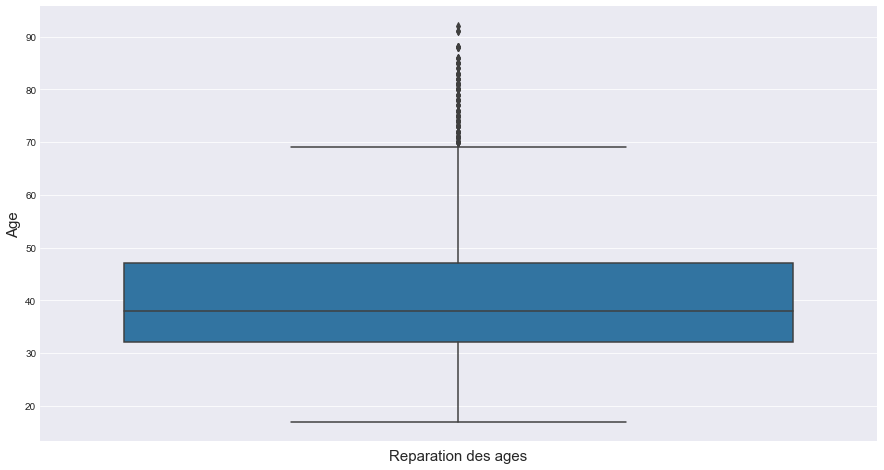

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.boxplot(x = 'age', data = df_client, orient = 'v')
ax.set_xlabel('Reparation des âges', fontsize=15)
ax.set_ylabel('Age', fontsize=15)

La meilleure façon de donner un aperçu précis de la dispersion de l'age est d'utiliser le coefficient variation (STD/Mean)*100

In [14]:
print(' Coefficient de variation : \n',(df.age.std()/df.age.mean())*100, '\n Dispersion moyennement élevée >15% \n')

 Coefficient de variation : 
 25.21060625245239 
 Dispersion moyennement élevé >15% 



A partir de la boite à moustache et du coefficient de variation, nous ne pouvons pas conclure si l’âge a un effet important sur notre variable à prédire ou pas. De ce fait, nous allons encoder cette variable par tranche d'âge.

In [15]:
df_client.groupby('age').nunique().sum()[0]

73

On a 73 différentes valeurs d'age. Pour une meilleure visualisation, on va créer une variable contenant les classes d'âge.

In [16]:
print(df_client.age.max()) #92
print(df_client.age.min()) #17

92
17


Création d'un label pour les tranches d'age

In [17]:
def label_age (row):
   if row['age'] < 10 :
      return '10'
   if row['age'] < 20 :
      return '10-20'
   if row['age'] < 30 :
      return '20-30'
   if row['age'] < 40 :
      return '30-40'
   if row['age'] < 50 :
      return '40-50'
   if row['age'] < 60 :
      return '50-60'
   if row['age'] <=92 :
      return 'Plus de 60'
   return 'Other'

df_client['lab'] = df_client.apply (lambda row: label_age (row),axis=1)
# df_client['lab'].unique()

#### De quelle tranche d'âge sont les clients de la banque ?

In [18]:
def percent (ax,total, **kwargs):
    for p in ax.patches: 
        height = p.get_height() 
        ax.text(p.get_x()+p.get_width()/2., 
          height + 3, 
          '{:1.2f}'.format((height/total)*100), 
          ha="center")

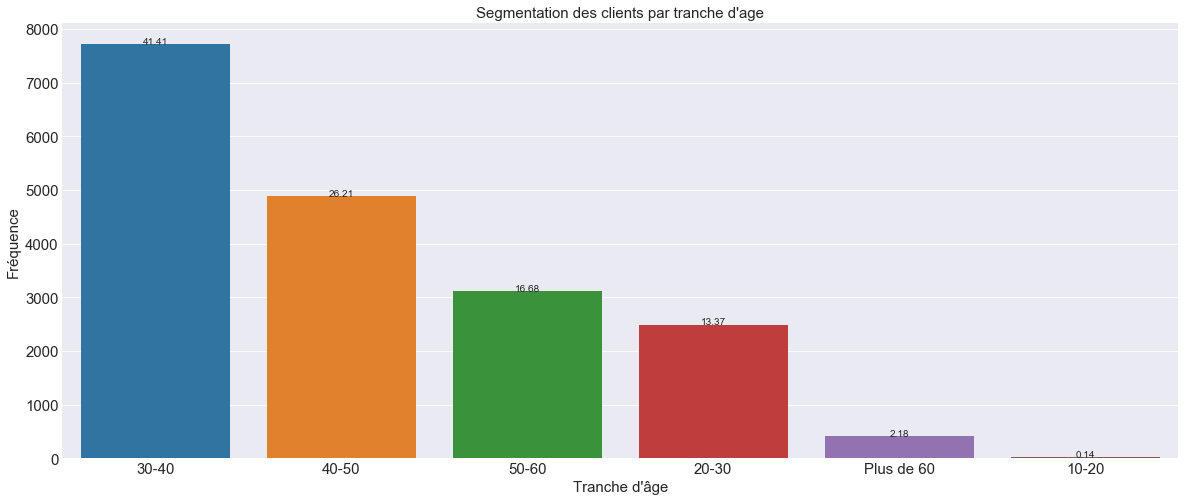

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'lab', data = df_client)
ax.set_xlabel("Tranche d'âge", fontsize=15)
ax.set_ylabel('Fréquence', fontsize=15)
ax.set_title("Segmentation des clients par tranche d'age", fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

percent(ax,total)

41% des clients de la banque ont un âge entre 30 et 40 ans, et 26% d'entre eux ont un âge entre 40 et 50 ans.


#### La variable Job

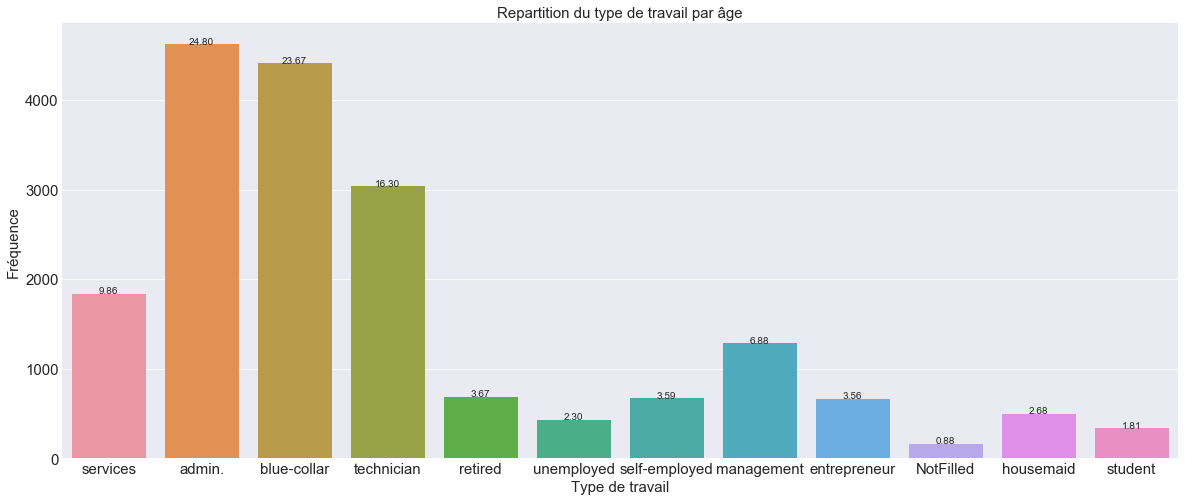

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df_client)
ax.set_xlabel('Type de travail', fontsize=15)
ax.set_ylabel('Fréquence', fontsize=15)
ax.set_title('Repartition du type de travail par âge', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

percent(ax,total)

Les clients de la banque sont majoritairement des employées en administration avec un taux de 25% ou travaillent en tant que col bleu avec un taux de 24% suivis de 16% travaillant en tant que technicien. 

#### En croisement avec la tranche d'âge

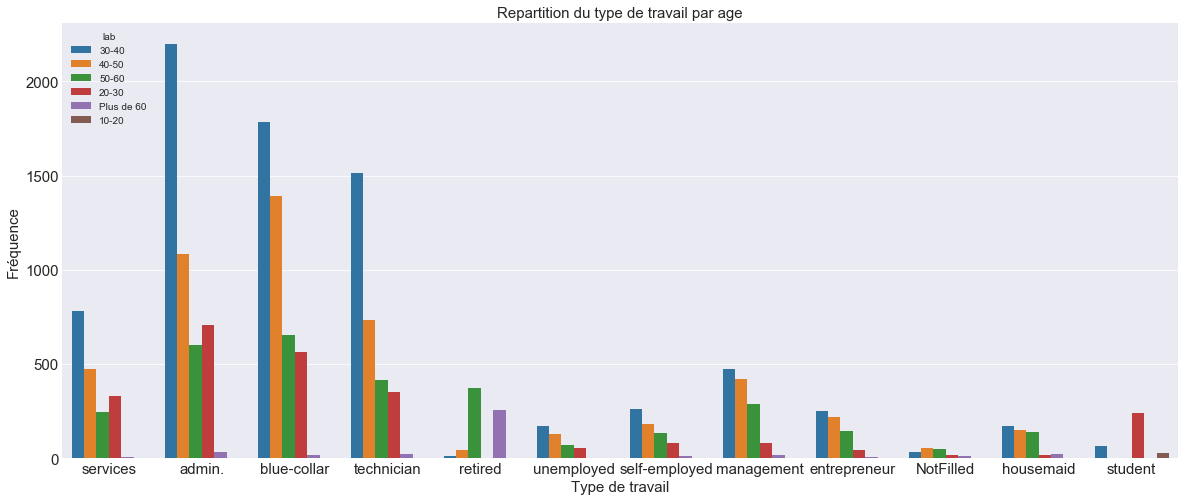

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', hue=df_client.lab, data = df_client)
ax.set_xlabel('Type de travail', fontsize=15)
ax.set_ylabel('Fréquence', fontsize=15)
ax.set_title('Repartition du type de travail par age', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

Ce croisement nous montre que la plupart des administrateur, cols bleu et techniciens sont de tranche d'age entre 30 ans à 40 ans (entre 1500 et plus de 2000 clients) suivis de ceux dont la tranche d'âge est 40 ans à 50 ans et une équivalence approximative entre ceux de la tranche d'âge de 20 ans à 30 ans et 50 ans à 60 ans. Cette équivalence s'explique par le simple fait que les clients sont soit en début de carrière soit en fin de carrière.

#### La variable Martial

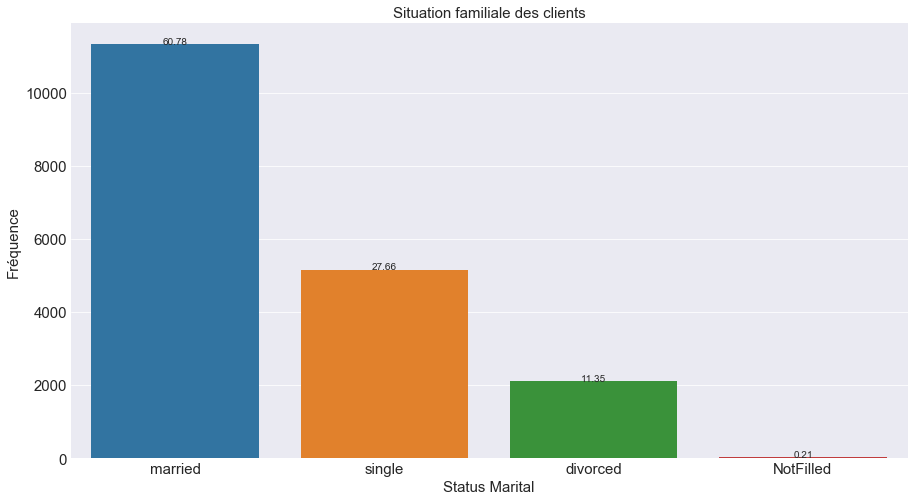

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'marital', data = df_client)
ax.set_xlabel('Status Marital', fontsize=15)
ax.set_ylabel('Fréquence', fontsize=15)
ax.set_title('Situation familiale des clients', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

percent(ax,total)

61% des clients sont mariés et 28% d'entre eux sont célibataires.


#### En croisement avec la tranche d'âge

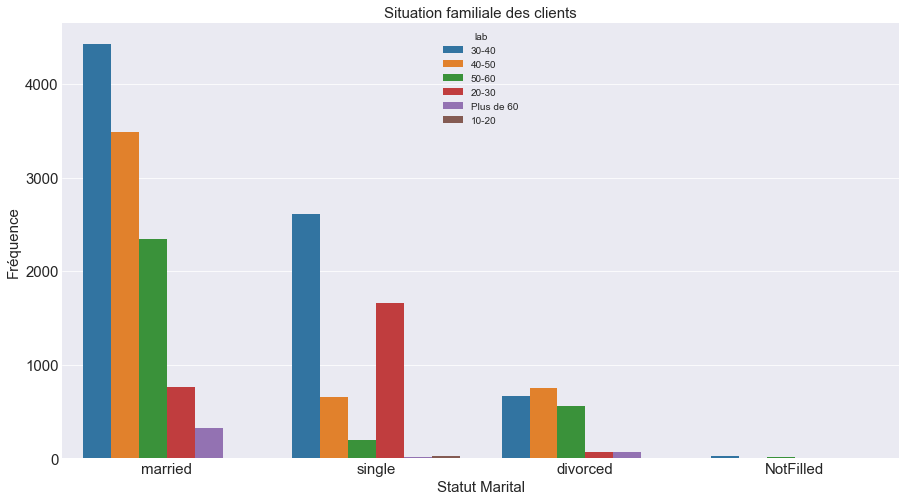

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.countplot(x = 'marital', hue='lab', data = df_client)
ax.set_xlabel('Statut Marital', fontsize=15)
ax.set_ylabel('Fréquence', fontsize=15)
ax.set_title('Situation familiale des clients', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

#### Degré d'éducation des clients

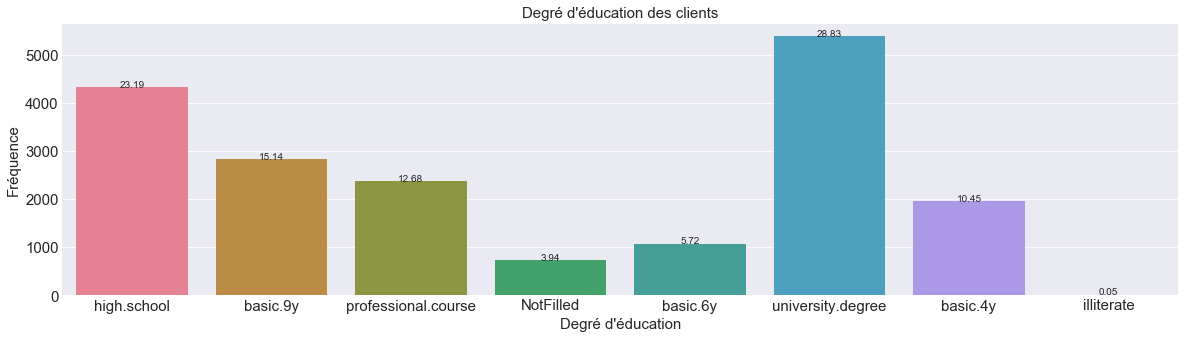

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', palette ='husl', data = df_client)
ax.set_xlabel("Degré d'éducation", fontsize=15)
ax.set_ylabel('Fréquence', fontsize=15)
ax.set_title("Degré d'éducation des clients", fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

percent(ax,total)

La majorité des clients ont un niveau d'éducation supérieur 29%, suivis par ceux qui ont un niveau secondaire 23%, on remarque que sa décroit plus le niveau baisse.

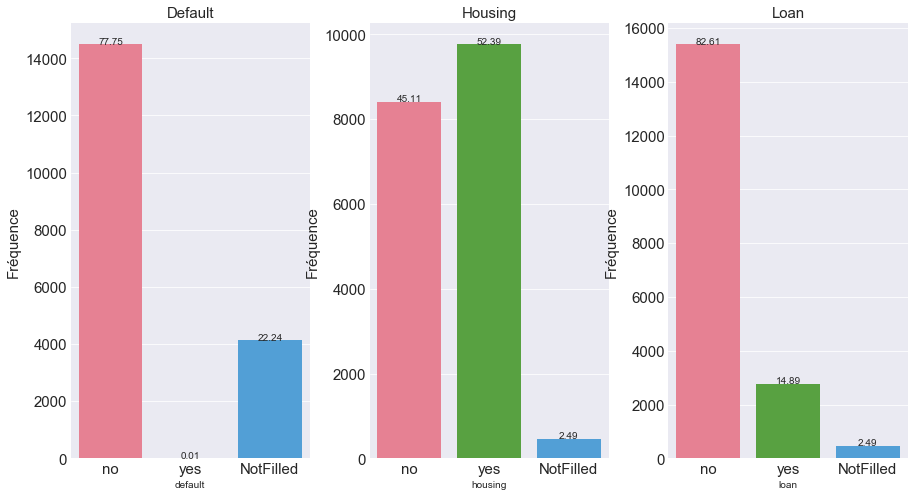

In [25]:
Classement = ['no', 'yes', 'NotFilled']
# Les clients en endettement 
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,8))
sns.countplot(x = 'default', palette='husl', data = df_client, ax = ax1, order = Classement)
ax1.set_title('Default', fontsize=15)
ax1.set_ylabel('Fréquence', fontsize=15)
ax1.tick_params(labelsize=15)

# Les clients ayant un prêt bancaire
sns.countplot(x = 'housing', palette='husl', data = df_client, ax = ax2, order = Classement)
ax2.set_title('Housing', fontsize=15)
ax2.set_ylabel('Fréquence', fontsize=15)
ax2.tick_params(labelsize=15)

# Les clients ayant un prêt personel
sns.countplot(x = 'loan', palette='husl', data = df_client, ax = ax3, order = Classement)
ax3.set_title('Loan', fontsize=15)
ax3.set_ylabel('Fréquence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

percent(ax1,total)
percent(ax2,total)
percent(ax3,total)

#### Croisement de la variable Job avec default, housing et loan

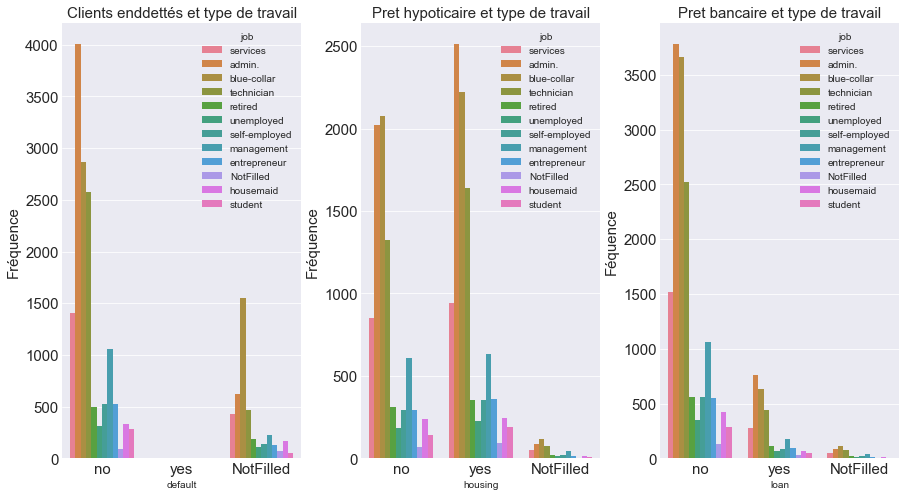

In [26]:
# Les clients en endettement et leur type de travail
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,8))
sns.countplot(x = 'default', palette='husl', hue = df_client.job, data = df_client, ax = ax1, order = Classement)
ax1.set_title('Clients enddettés et type de travail', fontsize=15)
ax1.set_ylabel('Fréquence', fontsize=15)
ax1.tick_params(labelsize=15)

# Les clients ayant un pret hypoticaire et leur type de travail
sns.countplot(x = 'housing', palette='husl', hue = df_client.job, data = df_client, ax = ax2, order = Classement)
ax2.set_title('Pret hypoticaire et type de travail', fontsize=15)
ax2.set_ylabel('Fréquence', fontsize=15)
ax2.tick_params(labelsize=15)

# Les clients ayant un pret bancaire et leur type de travail
sns.countplot(x = 'loan', palette='husl', hue = df_client.job, data = df_client, ax = ax3, order = Classement)
ax3.set_title('Pret bancaire et type de travail', fontsize=15)
ax3.set_ylabel('Féquence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

Un effet de taille dû à un non équilibre entre les différentes classes nous amène à voir ses répartitions de plus près.


#### Client en endettement et leur type de travail

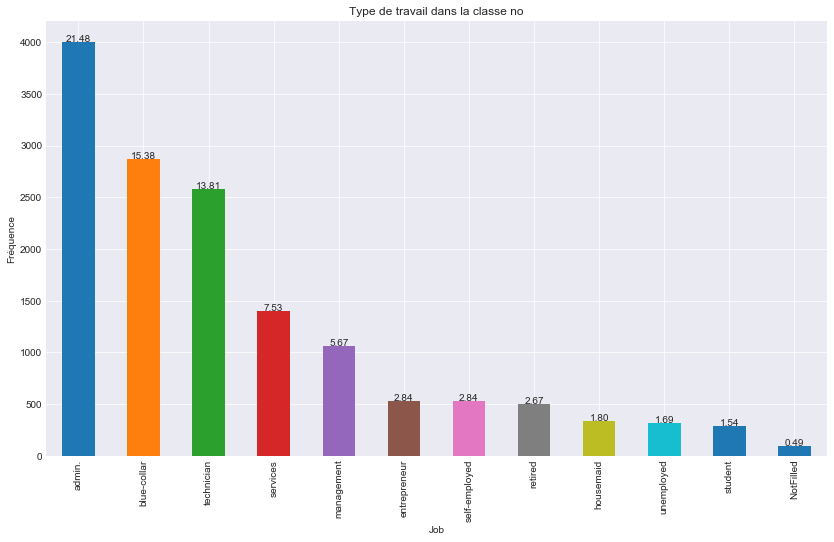

In [27]:
ax = df_client.loc[df_client['default']=='no',].job.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type de travail dans la classe no")
ax.set_xlabel("Job")
ax.set_ylabel("Fréquence")

percent(ax,total)

21% des administrateurs ne sont pas enddetter ainsi que 15% des clos bleu et 14% des techniciens.

Text(0,0.5,'Fréquence')

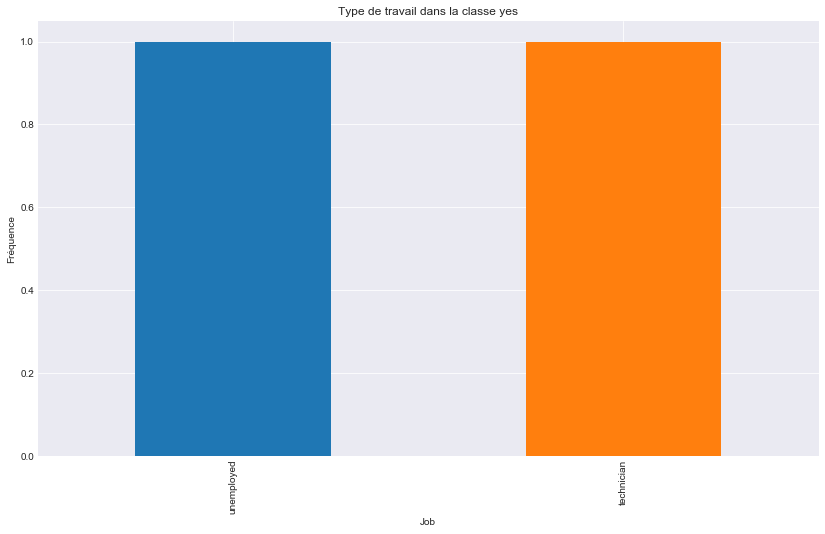

In [28]:
ax = df_client.loc[df_client['default']=='yes',].job.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type de travail dans la classe yes")
ax.set_xlabel("Job")
ax.set_ylabel("Fréquence")

Seulement deux client sont enddettés l'un est technicien et l'autre sans emplois.

#### Client ayant un pret hypoticaire et leur type de travail

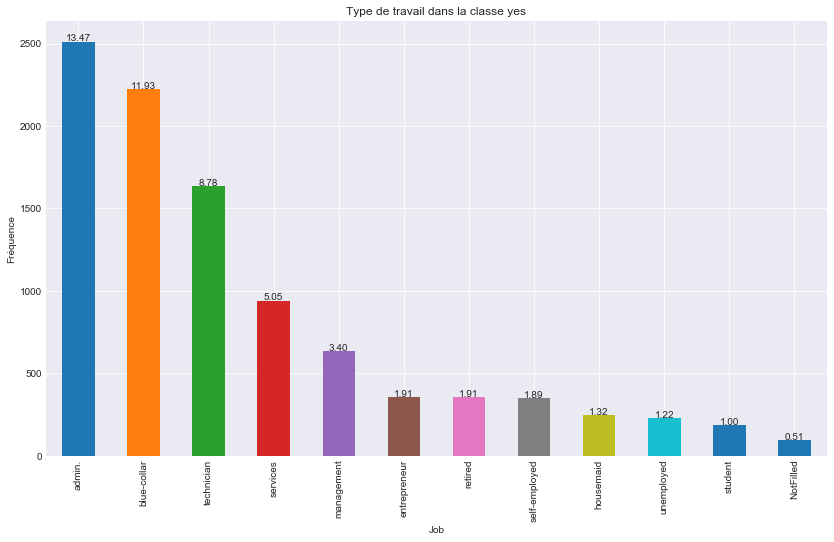

In [29]:
ax = df_client.loc[df_client['housing']=='yes',].job.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type de travail dans la classe yes")
ax.set_xlabel("Job")
ax.set_ylabel("Fréquence")

percent(ax,total)

13% des administrateurs ont un pret hypoticaire ainsi que 12% des clos bleu et 9% des techniciens.

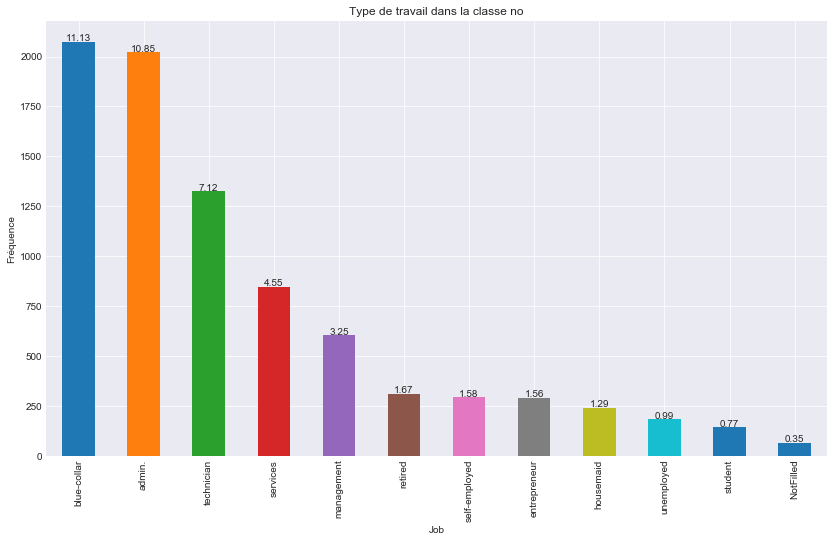

In [30]:
ax = df_client.loc[df_client['housing']=='no',].job.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type de travail dans la classe no")
ax.set_xlabel("Job")
ax.set_ylabel("Fréquence")

percent(ax,total)

11% des administrateurs ont un pret hypoticaire ainsi que 10% des clos bleu et 7% des techniciens.

#### Client ayant un pret bancaire et leur type de travail

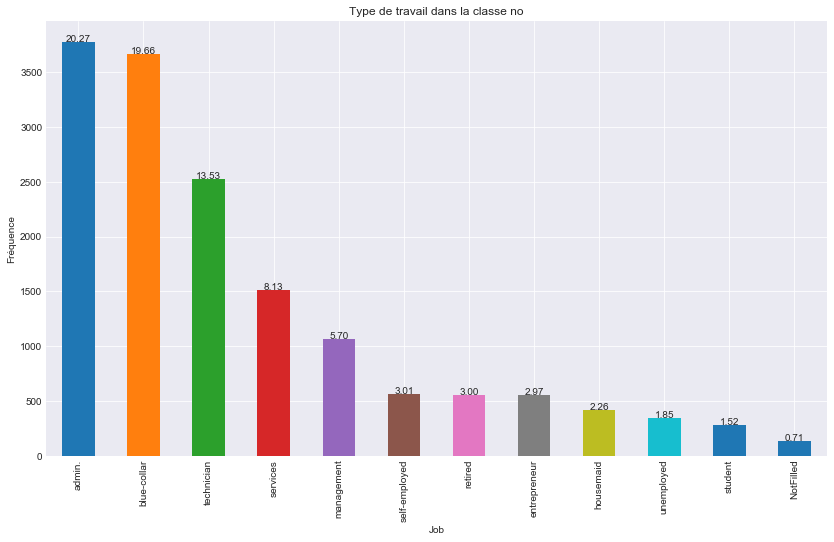

In [31]:
ax = df_client.loc[df_client['loan']=='no',].job.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type de travail dans la classe no")
ax.set_xlabel("Job")
ax.set_ylabel("Fréquence")

percent(ax,total)

La majorité des clients n'ayant pas un pret bancaire travaillent en administration avec un taux de 20.27% suivi par les cols bleu 19.66% et les techniciens 13.53% comparé aux étudiants qui représente seulement 1.52% 

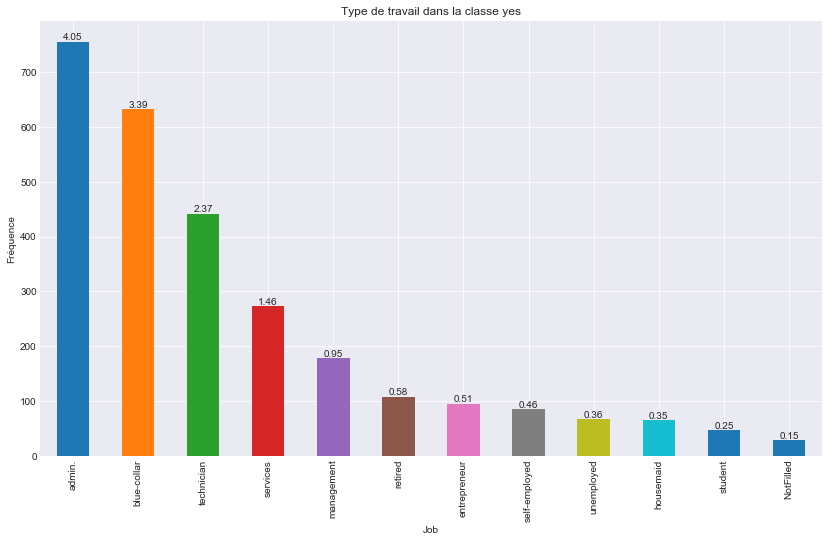

In [32]:
ax = df_client.loc[df_client['loan']=='yes',].job.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Type de travail dans la classe yes")
ax.set_xlabel("Job")
ax.set_ylabel("Fréquence")

percent(ax,total)

La majorité des clients ayant un pret bancaire travaillent en administration avec un taux de 4% suivi par les cols bleu 3% comparé aux étudiants qui représente seulement 0.25% 

#### Croisement de la variable lab (tranche d'age) avec default, housing et loan

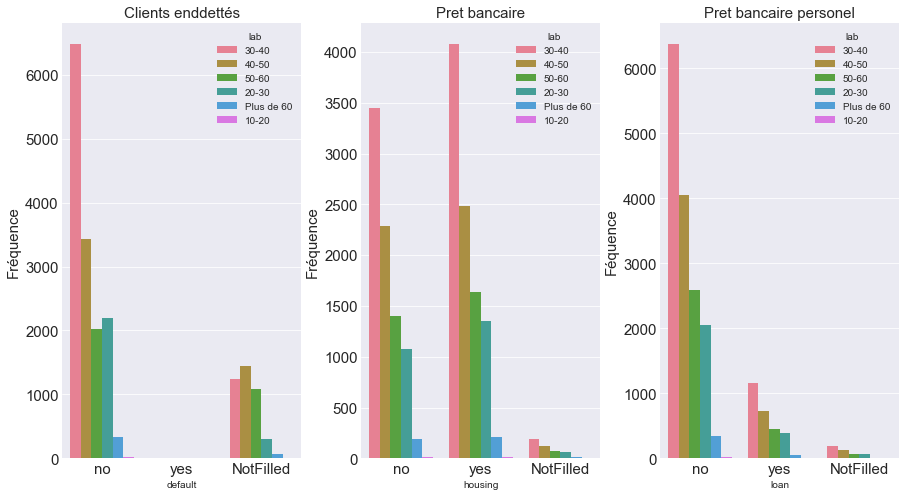

In [33]:
# Les clients en endettement et leur type de travail
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,8))
sns.countplot(x = 'default', palette='husl', hue = df_client.lab, data = df_client, ax = ax1, order = Classement)
ax1.set_title('Clients enddettés', fontsize=15)
ax1.set_ylabel('Fréquence', fontsize=15)
ax1.tick_params(labelsize=15)

# Les clients ayant un pret bancaire et leur type de travail
sns.countplot(x = 'housing', palette='husl', hue = df_client.lab, data = df_client, ax = ax2, order = Classement)
ax2.set_title('Pret bancaire', fontsize=15)
ax2.set_ylabel('Fréquence', fontsize=15)
ax2.tick_params(labelsize=15)

# Les clients ayant un pret personelle et leur type de travail
sns.countplot(x = 'loan', palette='husl', hue = df_client.lab, data = df_client, ax = ax3, order = Classement)
ax3.set_title('Pret bancaire personel', fontsize=15)
ax3.set_ylabel('Féquence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

#### On remarque que :

->La majorité des clients non enddettés sont de la tranche d'âge 30-40 suivi de ceux de 40-50.

->La majorité des clients ayant un pret hypoticaire sont de la tranche d'âge 30-40 suivi de ceux de 40-50 en comparant avec les non ayant un tel pret on retrouve aussi les même tranche d'âge les plus dominantes mais en faible proportion.

-> La majorité des clients n'ayant pas un pret bancaire sont de la tranche d'âge 30-40 suivi de ceux de 40-50 en comparant avec  ceux ayant un tel pret on retrouve aussi les même tranche d'âge les plus dominantes mais en faible proportion.

### Analyse des variables liées à la compagne

In [34]:
df_comp = df.iloc[: , 7:11]

df_comp.isna().sum()

campaign        0
pdays       18269
previous        0
poutcome    16452
dtype: int64

Les clients ayant un pdays manquant on peut supposé qu'ils sont des clients qui n'ont pas étés recontacté 
ou non jamais étaient contactés car on voit que soit ils ont un poutcome failure ou manquant
Dans ce cas on remplira les valeurs manquantes par "-1"

In [35]:
df_comp.pdays = df_comp.pdays.fillna(-1)

In [36]:
df_comp = df_comp.fillna("NotFilled")

In [37]:
df_comp.isna().sum()

campaign    0
pdays       0
previous    0
poutcome    0
dtype: int64

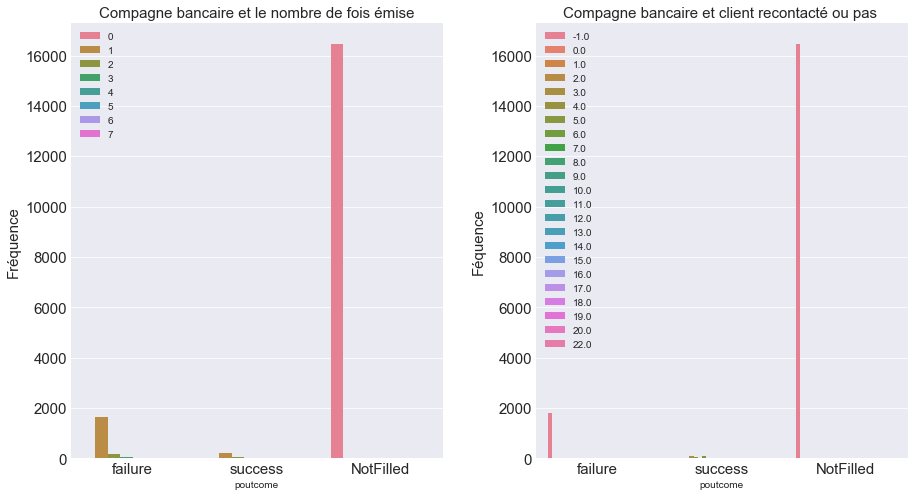

In [38]:
Classement_comp = ['failure','success','NotFilled']
fig, (ax2, ax3) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
# Les clients ayant un pret bancaire et leur type de travail
sns.countplot(x = 'poutcome', palette='husl', hue = df_comp.previous, data = df_comp, ax = ax2, order = Classement_comp)
ax2.set_title('Compagne bancaire et le nombre de fois émise', fontsize=15)
ax2.set_ylabel('Fréquence', fontsize=15)
ax2.tick_params(labelsize=15)
ax2.legend(loc ='upper left')

# Les clients ayant un pret personelle et leur type de travail
sns.countplot(x = 'poutcome', palette='husl', hue = df_comp.pdays, data = df_comp, ax = ax3, order = Classement_comp)
ax3.set_title('Compagne bancaire et client recontacté ou pas ', fontsize=15)
ax3.set_ylabel('Féquence', fontsize=15)
ax3.tick_params(labelsize=15)
ax3.legend(loc ='upper left')

plt.subplots_adjust(wspace=0.25)

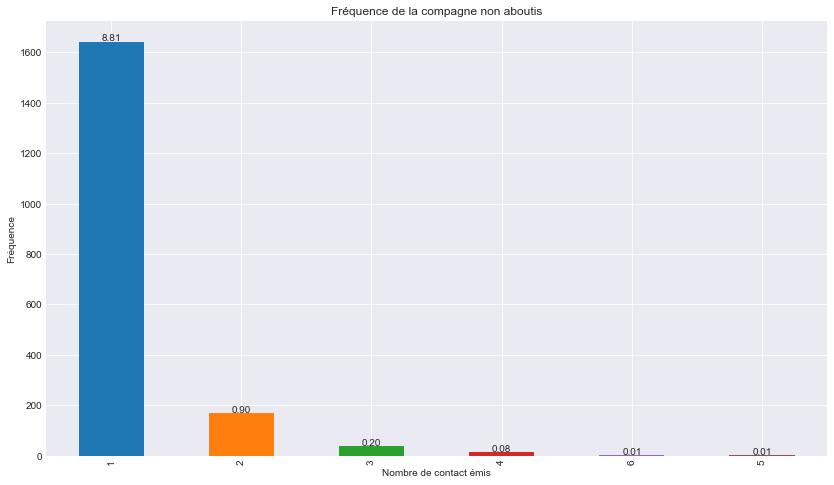

In [39]:
ax = df_comp.loc[df_comp['poutcome']=='failure',].previous.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Fréquence de la compagne non aboutis")
ax.set_xlabel("Nombre de contact émis")
ax.set_ylabel("Fréquence")

percent(ax,total)

La majorité des clients n'ont pas souscris dès le premier contact.

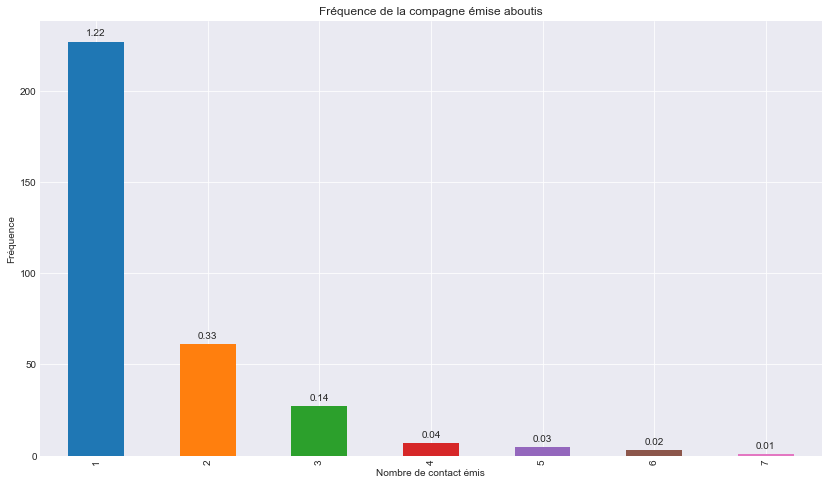

In [40]:
ax = df_comp.loc[df_comp['poutcome']=='success',].previous.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Fréquence de la compagne émise aboutis")
ax.set_xlabel("Nombre de contact émis")
ax.set_ylabel("Fréquence")

percent(ax,total)

Les clients ayant souscris l'ont fait beacoup plus dès le premier jour et peu d'entre eux dans les deux trois jours qui suivirent.

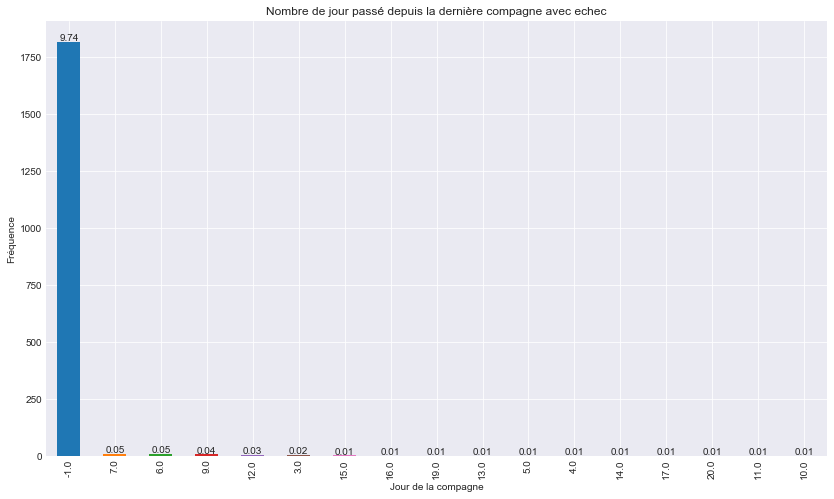

In [41]:
ax = df_comp.loc[df_comp['poutcome']=='failure',].pdays.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Nombre de jour passé depuis la dernière compagne avec echec")
ax.set_xlabel("Jour de la compagne")
ax.set_ylabel("Fréquence")

percent(ax,total)

Comme on l'avait supposé la majorité des clients dans ce cas, soit n'ont pas étés recontacter soit il ne l'ont jamais étés. 

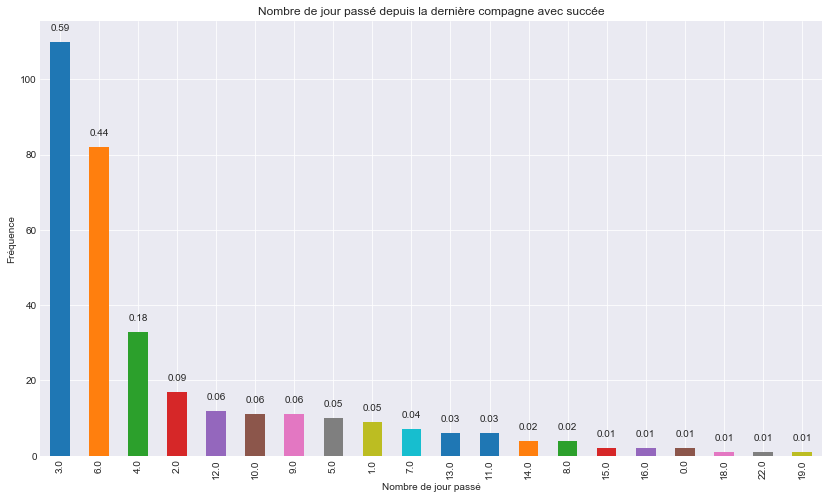

In [42]:
ax = df_comp.loc[df_comp['poutcome']=='success',].pdays.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Nombre de jour passé depuis la dernière compagne avec succée")
ax.set_xlabel("Nombre de jour passé")
ax.set_ylabel("Fréquence")

percent(ax,total)

Plus les jours passent plus la compagne à moins de chance d'avoir un succèe.


Cette analyse nous montre que plus le nombre des jours est réduit plus la compagne à plus de chance de réussir comme on l'a dit dans la remarque plus haut.

### Analyse des données social et économique des clients

In [43]:
df_socio_eco = df.iloc[: , 11:16]

In [44]:
df_socio_eco.isnull().sum()

emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

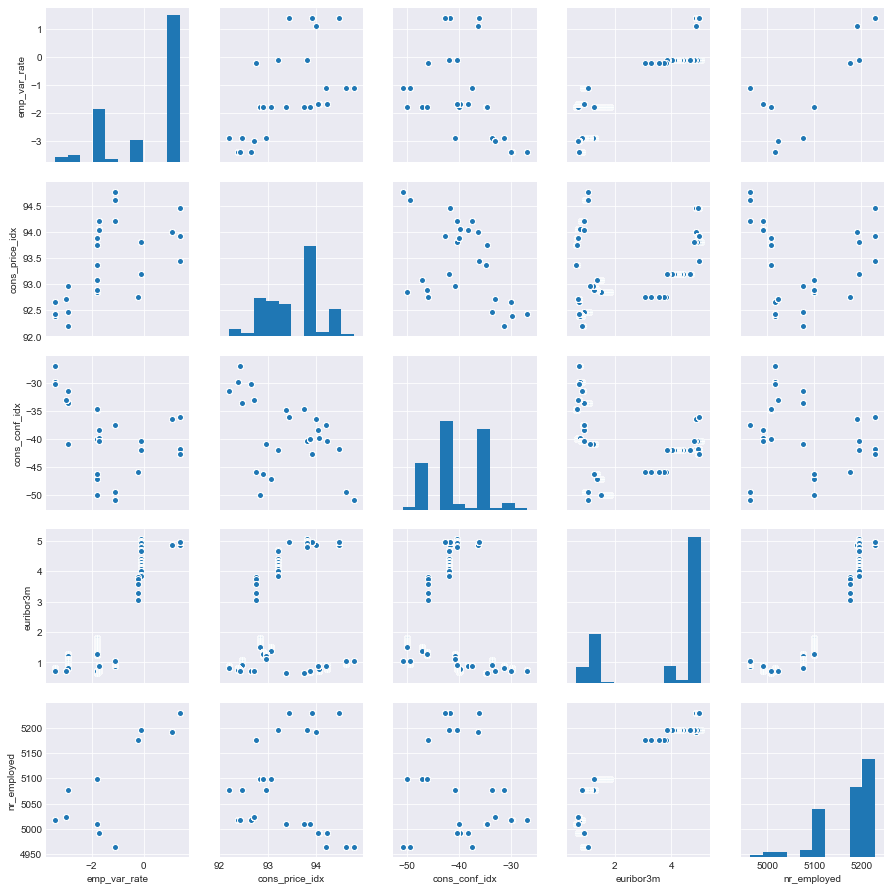

In [45]:
sns.pairplot(df_socio_eco)

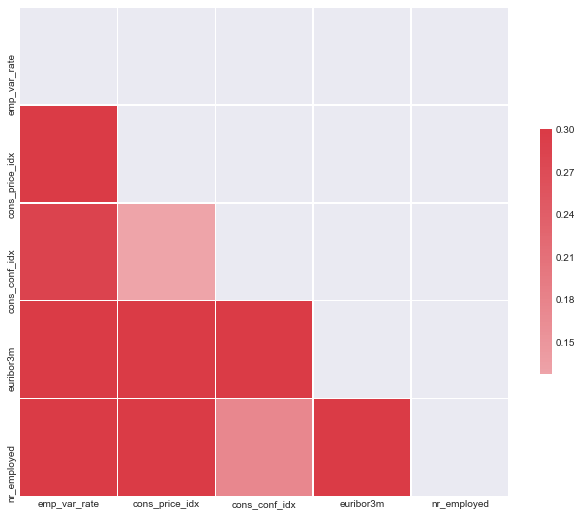

In [46]:
#Génération de la matrice de correlation
corr = df_socio_eco.corr()

# Génération du masque pour le triangle supérieur
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Génération d'une palette de couleur divergente
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# On trace la matrice de correlation
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Les deux graphes précedent nous informe que les variables sosciaux économique sont faiblement correler avec un taux de correlation variant entre 0.15 et 0.30.

### 2) Préparation des variables et mise en place des modèles de prédictions

Encodages des variables catégoriel en variables continues car il y aura une phase de centrage et réduction des variables par la suite.

In [47]:
labelencoder_X = LabelEncoder()
df_client['job']      = labelencoder_X.fit_transform(df_client['job']) 
df_client['marital']  = labelencoder_X.fit_transform(df_client['marital']) 
df_client['education']= labelencoder_X.fit_transform(df_client['education']) 
df_client['default']  = labelencoder_X.fit_transform(df_client['default']) 
df_client['housing']  = labelencoder_X.fit_transform(df_client['housing']) 
df_client['loan']     = labelencoder_X.fit_transform(df_client['loan'])

In [48]:
df_client.head()

age  job  marital  education  default  housing  loan    lab
0   37    8        2          4        1        2     1  30-40
1   45    8        2          3        0        1     1  40-50
2   59    1        2          6        1        1     1  50-60
3   41    2        2          0        0        1     1  40-50
4   24   10        3          6        1        2     1  20-30

Pour la variable age on utilisera une fonction pour la coder.

In [49]:
def encode_age(df):
    df.loc[(df['age'] >= 17) & (df['age'] <= 30), 'age'] = 1
    df.loc[(df['age'] > 30) & (df['age'] <= 40), 'age'] = 2
    df.loc[(df['age'] > 40) & (df['age'] <= 50), 'age'] = 3
    df.loc[(df['age'] > 50) & (df['age'] <= 60), 'age'] = 4
    df.loc[(df['age'] > 60), 'age'] = 4
    return df

encode_age(df_client)


age  job  marital  education  default  housing  loan         lab
0        2    8        2          4        1        2     1       30-40
1        3    8        2          3        0        1     1       40-50
2        4    1        2          6        1        1     1       50-60
3        3    2        2          0        0        1     1       40-50
4        1   10        3          6        1        2     1       20-30
5        3    2        2          0        0        1     1       40-50
6        1    2        3          4        1        1     2       20-30
7        4    6        2          3        0        2     2       50-60
8        2    2        2          2        1        2     1       30-40
9        3    2        2          2        0        2     2       40-50
10       1   11        2          4        1        1     1       30-40
11       3   10        3          4        1        2     1       40-50
12       2   10        2          7        1        1     2       30-40
13       4   10        2          0        1        2     1       50-60
14       2    7        2          3        0        1     1       30-40
15       4    5        2          1        0        2     1       50-60
16       4    2        1          1        1        1     1       50-60
17       2    8        2          4        1        1     1       30-40
18       3    1        2          7        1        2     1       40-50
19       4    5        0          7        1        2     1       50-60
20       2    3        2          4        1        2     1       30-40
21       3   10        3          6        0        1     1       40-50
22       3    2        2          3        1        2     1       40-50
23       4    1        2          4        1        1     1       50-60
24       4    2        2          1        0        1     1       50-60
25       3    5        2          7        0        1     2       50-60
26       3    8        2          4        0        2     1       40-50
27       1   10        3          7        1        2     1       20-30
28       3    3        2          7        0        1     1       40-50
29       3    2        2          2        0        2     1       40-50
...    ...  ...      ...        ...      ...      ...   ...         ...
18617    1    9        3          0        1        2     1       10-20
18618    1    2        3          6        1        2     1       30-40
18619    2    1        3          7        1        1     2       30-40
18620    2    1        3          7        1        2     1       30-40
18621    2    1        3          7        1        2     1       30-40
18622    1    9        3          3        1        2     1       10-20
18623    1    8        2          4        1        2     1       20-30
18624    3    1        3          4        1        2     1       40-50
18625    2    1        3          4        1        1     1       30-40
18626    2    1        3          4        1        1     1       30-40
18627    3    1        3          7        1        1     2       40-50
18628    4    1        2          4        1        2     1       50-60
18629    2   10        2          0        1        2     1       30-40
18630    4    5        2          7        1        2     1       50-60
18631    4   11        2          6        1        2     1       50-60
18632    3    1        2          7        1        2     1       40-50
18633    2    4        3          7        1        1     1       30-40
18634    2   10        1          1        1        1     1       30-40
18635    2    1        2          7        1        1     1       30-40
18636    4    8        2          4        1        2     1  Plus de 60
18637    2    9        2          6        1        2     1       30-40
18638    4    6        2          7        1        2     1  Plus de 60
18639    2    9        3          0        1        2     1       30-40
18640    4    6        2          6        1   

In [50]:
df_comp.poutcome.replace(['failure', 'success', 'NotFilled'], [1,2,3], inplace  = True)

On crée une table liant nos trois tables

In [51]:
dt = pd.concat([df_client.drop(columns='lab', axis = 1), df_comp,df_socio_eco], axis = 1)

In [52]:
dt.head()

age  job  marital  education  default  housing  loan  campaign  pdays  \
0    2    8        2          4        1        2     1         1   -1.0   
1    3    8        2          3        0        1     1         1   -1.0   
2    4    1        2          6        1        1     1         1   -1.0   
3    3    2        2          0        0        1     1         1   -1.0   
4    1   10        3          6        1        2     1         1   -1.0   

   previous  poutcome  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0         0         3           1.1          93.994          -36.4      4.857   
1         0         3           1.1          93.994          -36.4      4.857   
2         0         3           1.1          93.994          -36.4      4.857   
3         0         3           1.1          93.994          -36.4      4.857   
4         0         3           1.1          93.994          -36.4      4.857   

   nr_employed  
0       5191.0  
1       5191.0  
2       5191.0  
3       5191.0  
4       5191.0

In [53]:
Y = pd.get_dummies(df.subscription, columns = ['subscription'], prefix = ['subscription'], drop_first = True)

On reccupère la variable cible et on la transforme en variable indicatrice

## Rappel sur quelques notions en ADD

### Centrer et réduir les variables

Centrer une variable consiste à soustraire son espérance à chacune de ses valeurs initiales, soit retrancher à chaque donnée la moyenne (c'est ce qui s’appelle un centrage). Elle constitue simplement en un changement d’origine, qui place la moyenne de la distribution au point 0 de l'axe des abscisses1.
Réduire une variable consiste à diviser toutes ses valeurs par son écart type.

on obtient ainsi :

Des données indépendantes de l’unité ou de l’échelle choisie ;
Des variables ayant même moyenne et même dispersion.
On peut alors comparer plus aisément les variations. Centrer-réduire les variables est très utile en analyse de données :

Cela équivaut à un changement d’unité, et n’a pas d’incidence sur les profils de variation.
Les valeurs des coefficients de corrélation entre variables centrées réduites demeurent identiques à ce qu’elles étaient avant l’opération de centrage et réduction.

### La validation croisée (« cross-validation ») 

Est une méthode d’estimation de fiabilité d’un modèle fondé sur une technique d’échantillonnage. En fait, il y a au moins trois techniques de validation croisée : « testset validation » ou « holdout method », « k-fold cross-validation » et « leave-one-out cross validation » (LOOCV).

La première méthode est très simple, il suffit de diviser l'échantillon de taille n en échantillon d'apprentissage (> 60 % de l'échantillon) et échantillon de test. Le modèle est bâti sur l'échantillon d'apprentissage et validé sur l'échantillon de test. L'erreur est estimée en calculant l'erreur quadratique moyenne.
Dans la seconde, on divise k fois l'échantillon, puis on sélectionne un des k échantillons comme ensemble de validation et les (k-1) autres échantillons constitueront l'ensemble d'apprentissage. On calcule comme dans la première méthode l'erreur quadratique moyenne. Puis on répète l'opération en sélectionnant un autre échantillon de validation parmi les (k-1) échantillons qui n'ont pas encore été utilisé pour la validation du modèle. L'opération se répète ainsi k fois pour qu'en fin de compte chaque sous-échantillon ait été utilisé exactement une fois comme ensemble de validation. La moyenne des k erreurs quadratiques moyennes est enfin calculée pour estimer l'erreur de prédiction.
La troisième méthode est un cas particulier de la deuxième méthode où k=n, c'est-à-dire que l'on apprend sur (n-1) observations puis on valide le modèle sur la nième observation et l'on répète cette opération n fois.

### Matrice de confusion
La matrice de confusion est un outil servant à mesurer la qualité d'un système de classification. Un de ses intérêts est qu'elle montre rapidement si un système de classification parvient à classifier correctement.

In [54]:
#On divise la base entre apprentissage et test du modèle
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dt,Y,test_size=0.3, random_state=1356789)

#On centre et on réduit les données
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [55]:
# On importe les outils pour effetuer nos tests de validation du modèle par
# cross validation -> kfold et la matrice de confusion
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) #seed est à 0 et le nombre d'echantillons est égale à 10

#### Regression logistique
La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses. En d'autres termes d'associer à un vecteur de variables aléatoires (x_{1},.... ,x_{K}) une variable aléatoire binomiale génériquement notée y.

In [56]:
#Regression logistic
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression() 
logr.fit(X_train,Y_train)
logr_prd = logr.predict(X_test)

In [57]:
print(confusion_matrix(Y_test, logr_prd))

[[5495    1]
 [  98    1]]


In [58]:
#Score de la matrice de confusion
accuracy_score(Y_test, logr_prd)*100

98.23056300268097

In [59]:
#On calcule le score par cross validation en utilisant la méthode Kfold
#On prend la moyenne de tous les échantillons
crossval_logr = (cross_val_score(logr, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print (crossval_logr)

0.9787003103858994


In [60]:
Y_prob = logr.predict_proba(X_test)

In [61]:
print(Y_prob) # les probas pour chaque individus et chaque classe

[[0.99281784 0.00718216]
 [0.99408824 0.00591176]
 [0.99396974 0.00603026]
 ...
 [0.99052418 0.00947582]
 [0.99359759 0.00640241]
 [0.99419823 0.00580177]]


In [62]:
#On reccupère les probalités d'appartenance à chaque classe
logr_proba = pd.DataFrame({'Proba de la classe 0': np.around(Y_prob[:,0],2)*100,
                           'Proba de la classe 1': np.around(Y_prob[:,1],2)*100})

In [63]:
# print(logr_proba)

#### Principe de XGBoost
Si vous ne connaissiez pas cet algorithmes, il est temps d’y remédier car c’est une véritable star des compétitions de Machine Learning. Pour faire simple XGBoost (comme eXtreme Gradient Boosting) est une implémentation open source optimisée de l’algorithme d’arbres de boosting de gradient.

Mais qu’est-ce que le Boosting de Gradient ?

Le Boosting de Gradient est un algorithme d’apprentissage supervisé dont le principe et de combiner les résultats d’un ensemble de modèles plus simple et plus faibles afin de fournir une meilleur prédiction. On parle d’ailleurs de méthode d’agrégation de modèles. L’idée est donc simple au lieu d’utiliser un seul modèle, l’algorithme va en utiliser plusieurs qui serons ensuite combinés pour obtenir un seul résultat.

C’est avant tout une approche pragmatique qui permet donc de gérer des problèmes de régression comme de classification.

In [64]:
#Avec le modèle XGBOOST
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(X_train, Y_train)
xgboost_prd = xgboost.predict(X_test)

In [65]:
print(confusion_matrix(Y_test, xgboost_prd ))

[[5493    3]
 [  97    2]]


In [66]:
print(accuracy_score(Y_test, xgboost_prd)*100)

98.21268990169794


In [67]:
crossval_xgboost = (cross_val_score(estimator = xgboost, X = X_train, y = Y_train, cv = 10).mean())
print(crossval_xgboost)

0.9784711832319983


In [68]:
xgboost_porba = xgboost.predict_proba(X_test)

In [69]:
#On reccupère les probalités d'appartenance à chaque classe
xgboost_prob = pd.DataFrame({'Proba de la classe 0': np.around(xgboost_porba[:,0],2)*100,
                           'Proba de la classe 1': np.around(xgboost_porba[:,1],2)*100})

In [70]:
# print(xgboost_prob)

#### SVM ou Support Vector Machine

Les séparateurs à vastes marges sont des classificateurs qui reposent sur deux idées clés, qui permettent de traiter des problèmes de discrimination non linéaire, et de reformuler le problème de classement comme un problème d'optimisation quadratique.

La première idée clé est la notion de marge maximale. La marge est la distance entre la frontière de séparation et les échantillons les plus proches. Ces derniers sont appelés vecteurs supports. Dans les SVM, la frontière de séparation est choisie comme celle qui maximise la marge. Ce choix est justifié par la théorie de Vapnik-Chervonenkis (ou théorie statistique de l'apprentissage), qui montre que la frontière de séparation de marge maximale possède la plus petite capacité10. Le problème est de trouver cette frontière séparatrice optimale, à partir d'un ensemble d'apprentissage. Ceci est fait en formulant le problème comme un problème d'optimisation quadratique, pour lequel il existe des algorithmes connus.

Afin de pouvoir traiter des cas où les données ne sont pas linéairement séparables, la deuxième idée clé des SVM est de transformer l'espace de représentation des données d'entrées en un espace de plus grande dimension (possiblement de dimension infinie), dans lequel il est probable qu'il existe une séparation linéaire. Ceci est réalisé grâce à une fonction noyau, qui doit respecter les conditions du théorème de Mercer, et qui a l'avantage de ne pas nécessiter la connaissance explicite de la transformation à appliquer pour le changement d'espace. Les fonctions noyau permettent de transformer un produit scalaire dans un espace de grande dimension, ce qui est coûteux, en une simple évaluation ponctuelle d'une fonction. Cette technique est connue sous le nom de kernel trick (ou astuce du noyau).

In [71]:
#Modèle SVM Support Vector Machine
from sklearn.svm import SVC
svm= SVC(kernel = 'sigmoid', probability=True) 
# le noyau qu'on utilise ici est sigmoid
# car nos données ne sont pas linéaires et le noyau sigmoid se rapproche plus de la regression logistique
svm.fit(X_train, Y_train)
svm_prd = svm.predict(X_test)

In [72]:
print(confusion_matrix(Y_test, svm_prd))

[[5409   87]
 [  95    4]]


In [73]:
print(accuracy_score(Y_test, svm_prd)*100)

96.74709562109027


In [74]:
crossval_svm = (cross_val_score(svm, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(crossval_svm)

0.965445541649798


In [75]:
svm_porba = svm.predict_proba(X_test)
#On reccupère les probalités d'appartenance à chaque classe
svm_prob = pd.DataFrame({'Proba de la classe 0': np.around(svm_porba[:,0],2)*100,
                           'Proba de la classe 1': np.around(svm_porba[:,1],2)*100})
# print(svm_prob)

#### Arbre de décision

Un arbre de décision est un outil d'aide à la décision représentant un ensemble de choix sous la forme graphique d'un arbre. Les différentes décisions possibles sont situées aux extrémités des branches (les « feuilles » de l'arbre), et sont atteints en fonction de décisions prises à chaque étape. L'arbre de décision est un outil utilisé dans des domaines variés tels que la sécurité, la fouille de données, la médecine, etc. Il a l'avantage d'être lisible et rapide à exécuter. Il s'agit de plus d'une représentation calculable automatiquement par des algorithmes d'apprentissage supervisé.

In [76]:
#Modèle Arbre de decision
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, Y_train)
tree_prd = tree.predict(X_test)

In [77]:
print(confusion_matrix(Y_test, tree_prd))

[[5342  154]
 [  86   13]]


In [78]:
print(accuracy_score(Y_test, tree_prd)*100)

95.71045576407506


In [79]:
crossval_tree = (cross_val_score(tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(crossval_tree)

0.9557155597800897


In [80]:
tree_porba = tree.predict_proba(X_test)
#On reccupère les probalités d'appartenance à chaque classe
tree_prob = pd.DataFrame({'Proba de la classe 0': np.around(tree_porba[:,0],2)*100,
                           'Proba de la classe 1': np.around(tree_porba[:,1],2)*100})
# print(tree_prob)

#### Random Forest 
Cet algorithme appartient à la famille des agrégations de modèles, c’est en fait un cas particulier de bagging (bootstrap aggregating) appliqué aux arbres de décision.
Le principe des méthodes de Bagging, et donc en particulier des forêts aléatoires c’est de faire la moyenne des prévisions de plusieurs modèles indépendants pour réduire la variance et donc l’erreur de prévision. Pour construire ces différents modèles, on sélectionne plusieurs échantillons bootstrap, c’est à dire des tirages avec remises.

En plus du principe de bagging, les forêts aléatoires ajoutent de l’aléa au niveau des variables. Pour chaque arbre on sélectionne un échantillon bootstrat d’individus et à chaque étape, la construction d’un noeud de l’arbre se fait sur un sous-ensemble de variables tirées aléatoirement.

On se retrouve donc avec plusieurs arbres et donc des prédictions différentes pour chaque individu.

Dans le cas d’une classification : on choisit la catégorie la plus fréquente

In [81]:
# Modèle Foret Aléatoire ou Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_train, Y_train)
rf_prd = rf.predict(X_test)

In [82]:
print(confusion_matrix(Y_test, rf_prd ))

[[5480   16]
 [  96    3]]


In [83]:
print(accuracy_score(Y_test, rf_prd)*100)

97.99821268990169


In [84]:
crossval_rf = (cross_val_score(rf, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(crossval_rf)

0.9767850122922205


In [85]:
rf_porba = rf.predict_proba(X_test)
#On reccupère les probalités d'appartenance à chaque classe
rf_prob = pd.DataFrame({'Proba de la classe 0': np.around(rf_porba[:,0],2)*100,
                           'Proba de la classe 1': np.around(rf_porba[:,1],2)*100})
# print(rf_prob)

In [86]:
#On regroupe les taux de prédictions de la cross validation dans un tableau 
crossval = pd.DataFrame({'Modèle testé': ['Regression Logistique', 'XGBOOST','SVM','Arbre de décision','Foret aléatoire'],
                           "Taux d'erreur de prédiction %": 
                         [100-crossval_logr*100,100-crossval_xgboost*100,100-crossval_svm*100,
                          100-crossval_tree*100,100-crossval_rf*100]})
print(crossval.sort_values(by="Taux d'erreur de prédiction %", ascending=True))

            Modèle testé  Taux d'erreur de prédiction %
0  Regression Logistique                       2.129969
1                XGBOOST                       2.152882
4        Foret aléatoire                       2.321499
2                    SVM                       3.455446
3      Arbre de décision                       4.428444


### 3) Courbe ROC et choix du modèle

La courbe ROC (Receiver Operating Characteristic) est un outil couramment utilisé avec les classificateurs binaires. Elle représente en ordonnée la proportion de tests positifs parmi les clients ayant souscris (la sensibilité) en fonction de la proportion de tests positifs parmi les n'ayant pas souscris (complément de la spécificité ou 1 – spécificité, en abscisse). En outre, cette courbe permet de représenter la capacité d'un test à discriminer entre les deux classes.
Pour l'interprétation, on prend par exemple la diagonal comme étant la représentation de la courbe ROC d'un classificateur purement aléatoire; un bon classificateur reste aussi loin que possible de cette ligne (vers le coin supérieur gauche).

In [87]:
from sklearn import metrics

fprlogr, tprlogr, thresholdlogr = metrics.roc_curve(Y_test, Y_prob[:,1])

fprxgboost, tprxgboost, thresholdxgboost = metrics.roc_curve(Y_test, xgboost_porba[:,1])

fprsvm, tprsvm, thresholdsvm = metrics.roc_curve(Y_test, svm_porba[:,1])

fprrf, tprrf, thresholdrf = metrics.roc_curve(Y_test, rf_porba[:,1])

fprtree, tprtree, thresholdtree = metrics.roc_curve(Y_test, tree_porba[:,1])

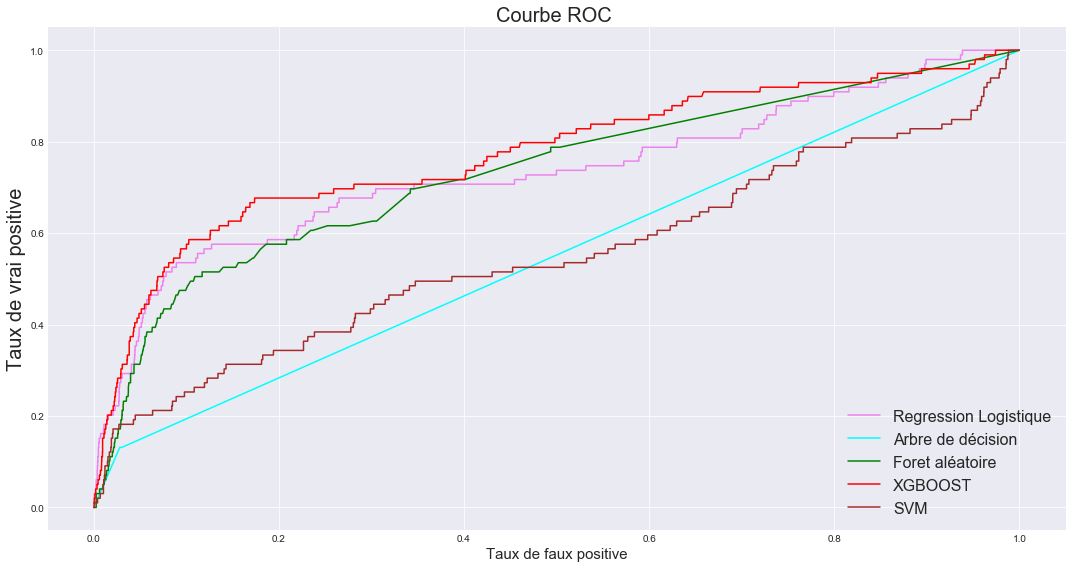

In [88]:
# On remarque que le XGBOOST, Random Forest et la Regression logistique donnent les meilleurs resultats

# Allure de la courbe ROC des modèles

fig, ax = plt.subplots( figsize = (15,8))

ax.plot(fprlogr, tprlogr, 'b', label = 'Regression Logistique', color='violet')
ax.plot(fprtree, tprtree, 'b', label = 'Arbre de décision', color='cyan')
ax.plot(fprrf, tprrf, 'b', label = 'Foret aléatoire', color='green')
ax.plot(fprxgboost, tprxgboost, 'b', label = 'XGBOOST', color='red')
ax.plot(fprsvm, tprsvm, 'b', label = 'SVM', color='brown')

ax.set_title('Courbe ROC ',fontsize=20)
ax.set_ylabel('Taux de vrai positive',fontsize=20)
ax.set_xlabel('Taux de faux positive',fontsize=15)
ax.legend(loc ='lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

### Interprétation

La courbe ROC élargit l'analyse des performances d'un test diagnostique à des situations où le test restitue des valeurs continues, ou ordinales. Cet outil graphique met en rapport la proportion de vrais positifs (parmi les clients souscris) avec la proportion de faux positifs (parmi les clients non-souscris) pour toutes les valeurs-seuil du test. L'aire sous la courbe résume la capacité du test à discriminer entre les deux classes.

On remarque donc que le modèle le plus performant est le XGBOOST qui à un pouvoir plus discriminant que les autres modèles et il est celui qui tends le plus vers le coin superieur gauche. Par contre, le modèle SVM à donner de très mauvais résultats.

## 4) Prédicition des clients sur la base Test

In [89]:
df_test = pd.read_csv("./test.csv", sep =';')

In [90]:
df_test.pdays = df_test.pdays.fillna(-1)

In [91]:
df_test = df_test.fillna("NotFilled")

In [92]:
df_test.isna().sum()

id                0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
dtype: int64

In [93]:
labelencoder_X = LabelEncoder()
df_test['job']      = labelencoder_X.fit_transform(df_test['job']) 
df_test['marital']  = labelencoder_X.fit_transform(df_test['marital']) 
df_test['education']= labelencoder_X.fit_transform(df_test['education']) 
df_test['default']  = labelencoder_X.fit_transform(df_test['default']) 
df_test['housing']  = labelencoder_X.fit_transform(df_test['housing']) 
df_test['loan']     = labelencoder_X.fit_transform(df_test['loan'])

encode_age(df_test)

df_test.poutcome.replace(['failure', 'success', 'NotFilled'], [1,2,3], inplace  = True)

In [94]:
dtt = sc_X.transform(df_test.drop(columns='id', axis=1))

In [95]:
pred = xgboost.predict(dtt)

In [96]:
xgboost_porba_dtt = xgboost.predict_proba(dtt)

In [97]:
#On reccupère les probalités d'appartenance à chaque classe
xgboost_prob_test = pd.DataFrame({'Id Client' : df_test.id,
                           'Prob_0': np.around(xgboost_porba_dtt[:,0],2)*100,
                           'Prob_1': np.around(xgboost_porba_dtt[:,1],2)*100})
# print(xgboost_prob_test)

In [98]:
def label_classe (row):
   if row['Prob_1'] < 50 :
      return 'No'
   if row['Prob_1'] > 49 :
      return 'Yes'
   if row['Prob_1'] < 100 :
      return 'Yes'
   return 'Other'

xgboost_prob_test['subscription'] = xgboost_prob_test.apply (lambda row: label_classe (row),axis=1)
# xgboost_prob_test['subscription'].unique()

In [99]:
xgboost_prob_test['Prob'] = xgboost_prob_test[['Prob_0','Prob_1']].max(axis=1)
# xgboost_prob_test

In [100]:
#on exporte le fichier en format excel
writer = pd.ExcelWriter('prediction.xlsx')
xgboost_prob_test.drop(columns=['Prob_0','Prob_1'], axis=1).to_excel(writer,'Prediction')
writer.save()

#### On peut aller plus loin avec XGBOOST et on regarde l'importances des critères choisis avec ce modèle ce qui nous permettra de determiner les variables ayant le plus contribués à la génération du modèle

In [101]:
import xgboost as xgb

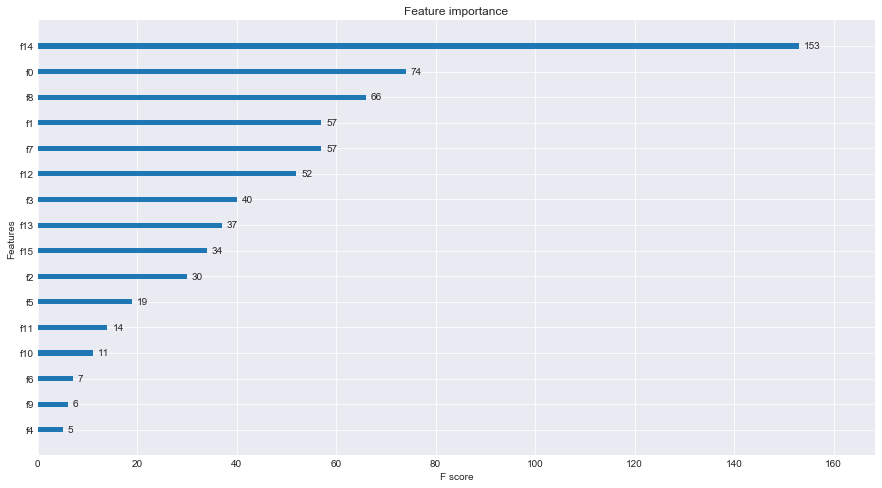

In [102]:
def my_plot_importance(booster, figsize, **kwargs): 
    from matplotlib import pyplot as plt
    from xgboost import plot_importance
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax, **kwargs)

figsize = (15,8)
my_plot_importance(xgboost,figsize)

Cette figure nous montre quelles sont les variables ayant le plus contribués à la génération du modèle dont on retient les plus pertinentes : age job campaign pdays cons_price_idx euribor3m.

    F0	->	age
    F1	->	job
    F2	->	marital
    F3	->	education
    F4	->	default
    F5	->	housing
    F6	->	loan
    F7	->	campaign
    F8	->	pdays
    F9	->	previous
    F10	->	poutcome
    F11	->	emp_var_rate
    F12	->	cons_price_idx
    F13	->	cons_conf_idx
    F14	->	euribor3m
    F15	->	nr_employed

### 5) Génération du nouveau modèle avec les variables les plus participatives

Pour cela on prendra les variables dont le F-score est >=50 ce qui nous laisse les variables suivantes :

>age
>job
>campaign
>pdays
>cons_price_idx
>euribor3m

In [103]:
dtn = dt.drop(columns=['marital', 'education','default', 'housing',
                 'loan','previous', 'poutcome', 'emp_var_rate',
                 'cons_conf_idx', 'nr_employed'], axis =1)

In [104]:
X_trainn, X_testn, Y_trainn, Y_testn = train_test_split(dtn, Y, test_size=0.3, random_state=1356789)

#On centre et on réduit les données
from sklearn.preprocessing import StandardScaler
sc_Xn = StandardScaler()
X_trainn = sc_Xn.fit_transform(X_trainn)
X_testn = sc_Xn.transform(X_testn)

xgboostn = XGBClassifier()
xgboostn.fit(X_trainn, Y_trainn)
xgboost_prdn = xgboostn.predict(X_testn)

print(confusion_matrix(Y_testn, xgboost_prdn ))
print(accuracy_score(Y_testn, xgboost_prd)*100)
crossval_xgboostn = (cross_val_score(estimator = xgboostn, X = X_trainn, y = Y_trainn, cv = 10).mean())
print(crossval_xgboostn)



[[5492    4]
 [  97    2]]
98.21268990169794
0.9785474593600083


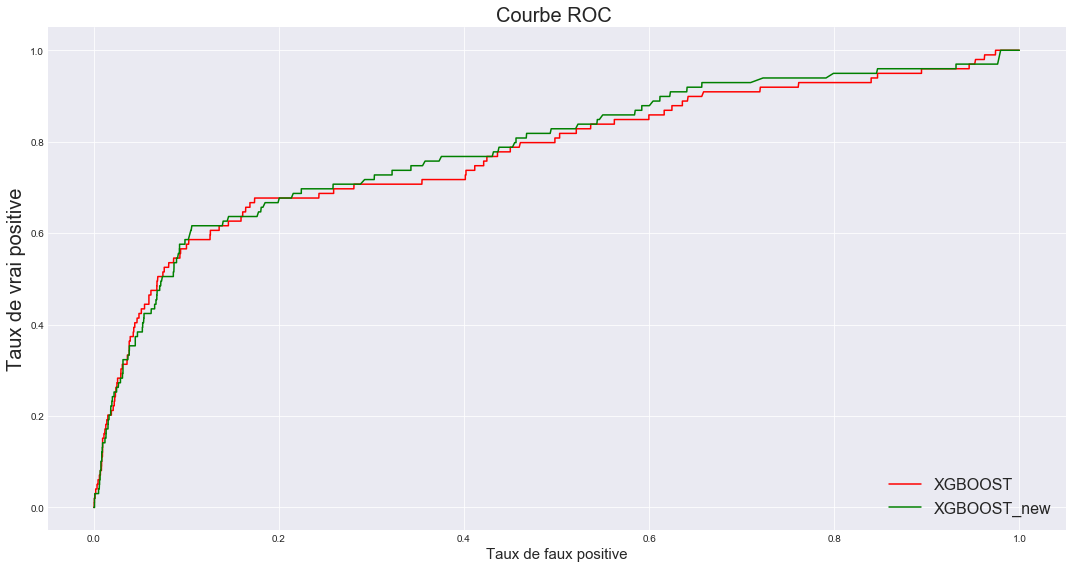

In [105]:
xgboost_porban = xgboostn.predict_proba(X_testn)
fprxgboostn, tprxgboostn, thresholdxgboostn = metrics.roc_curve(Y_testn, xgboost_porban[:,1])

fig, ax = plt.subplots( figsize = (15,8))

ax.plot(fprxgboost, tprxgboost, 'b', label = 'XGBOOST', color='red')
ax.plot(fprxgboostn, tprxgboostn, 'b', label = 'XGBOOST_new', color='green')

ax.set_title('Courbe ROC ',fontsize=20)
ax.set_ylabel('Taux de vrai positive',fontsize=20)
ax.set_xlabel('Taux de faux positive',fontsize=15)
ax.legend(loc ='lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

On voit très bien comment les deux courbes sont presque confondus d'une part, et de l'autre part on voit comment le nouveau modèle prend légèrement le dessus sur l'ancien modèle.

## 6) Prediction avec le nouveau modèle sur la base Test

In [106]:
df_test.drop(columns=['marital', 'education','default', 'housing',
                 'loan','previous', 'poutcome', 'emp_var_rate',
                 'cons_conf_idx', 'nr_employed'], inplace=True, axis =1)

In [107]:
dfn = sc_Xn.transform(df_test.drop(columns='id', axis=1))

In [108]:
predn = xgboostn.predict(dfn)
xgboost_porba_dfn = xgboostn.predict_proba(dfn)
#On reccupère les probalités d'appartenance à chaque classe
xgboost_prob_testn = pd.DataFrame({'Id Client' : df_test.id,
                           'Prob_0': np.around(xgboost_porba_dfn[:,0],2)*100,
                           'Prob_1': np.around(xgboost_porba_dfn[:,1],2)*100})
# print(xgboost_prob_test)

xgboost_prob_testn['subscription'] = xgboost_prob_testn.apply (lambda row: label_classe (row),axis=1)
xgboost_prob_testn['Prob'] = xgboost_prob_testn[['Prob_0','Prob_1']].max(axis=1)

#on exporte le fichier en format excel dans un autre fichier
writer = pd.ExcelWriter('prediction_new.xlsx')
xgboost_prob_testn.drop(columns=['Prob_0','Prob_1'], axis=1).to_excel(writer,'Prediction New')
writer.save()

#### Encore une fois, XGBOOST est basé sur les arbres de décision, ce qui est très éloquent dans les arbres de décision c'est les graphes qu'elle fournit et qui permettent une meilleure interprétation de nos donées vis-à-vis de notre variable cible

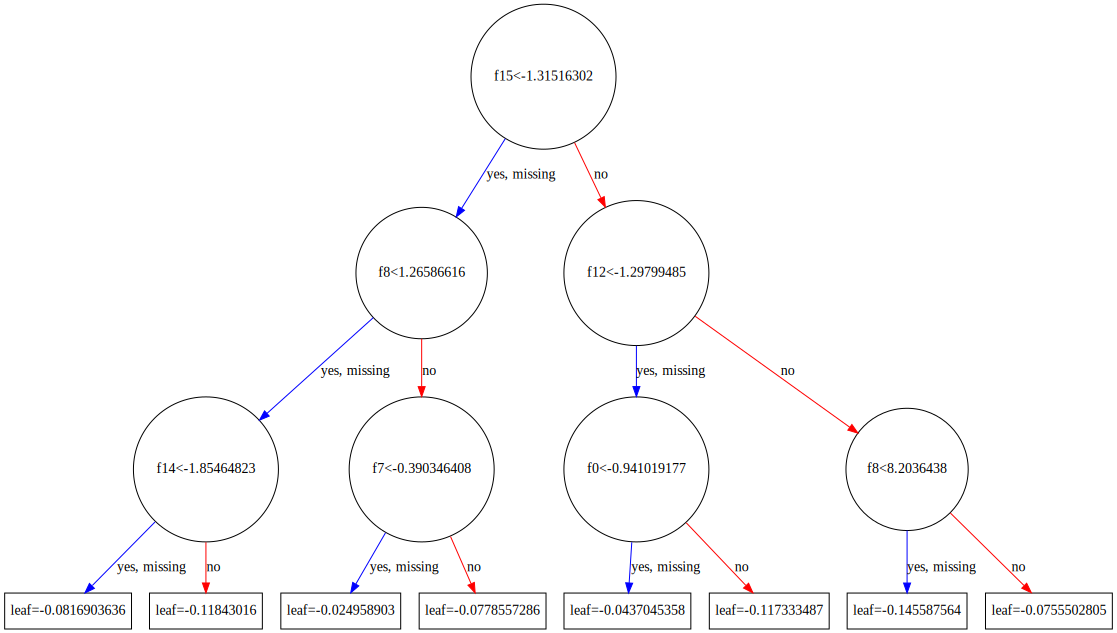

In [109]:
xgb.to_graphviz(xgboost, num_trees=4)

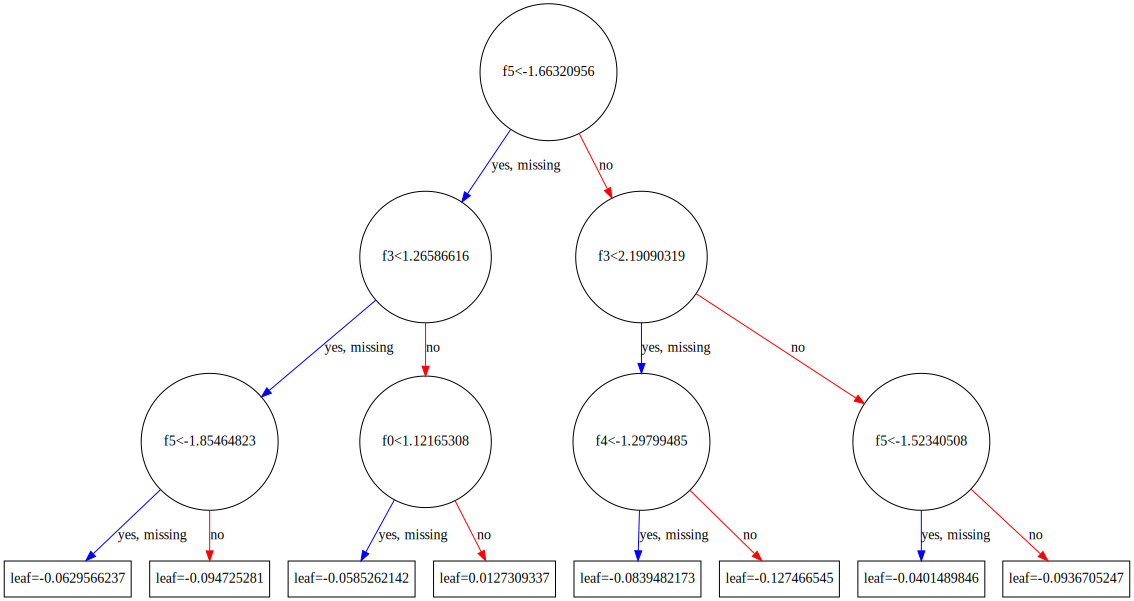

In [110]:
xgb.to_graphviz(xgboostn, num_trees=7)

F0	age

F1	job

F2	campaign

F3	pdays

F4	cons_price_idx

F5	euribor3m

In [111]:
#EOF

# Conclusion

Dans ce projet nous avons explorer la base et les différentes variables selon leur catégories pour nous permettre de choisir un modèle adéquat a notre problématique de départ qui est de prédire les futurs souscriptions des clients. Durant notre travail nous avons pu comparer diffèrent modèle de prédiction qui permettent une classification binaire (insensible aux variables manquantes), après avoir testé et comparer ses modèles notre choix s'est porté sur XGBOOST qui s'est démarqué graphiquement sur la courbe ROC. Nous avons ensuite, étudier la pertinence des variables qui on permit la construction de ce modèle, après les avoir identifié grâce au graphe d'importance des variables, nous avons construit un nouveau modèle basé sur ses derniers et nous l'avons comparé avec le premier XGBOOST ou il a montré une légère amélioration par rapport à celui-ci.
Pour finir, nous avons exploiter la force d'interprétation des arbre de décision sur lesquelles est basé XGBOOST et nous avons eu un aperçu sur la ségmentation de l'echantillion ou (on se basera sur le nouveau modèle dans ce qui suit) :

>- Le premier sommet est appelé la « racine » de l’arbre. Il est situé sur le premier niveau. Nous y observons un critère pour le choix de la variable à prédire « Souscription ». Ce qui définit ce choix a ce niveau c'est la variable socio-économique euribor3m (si supérieur à -1.66320956 on va vers non, oui sinon).
>- La variable « compaign » est la seconde variable utilisée ; on parle de variable de segmentation.
>- Au dernier niveau on retrouve encore une fois euribor3m et une autre variable socio-économique cons_price_idx qui définissent les critères de découpage mais on y trouve aussi la variable âge.

On peut dire que les variables socio-économiques sont les variables les plus discriminantes de la base des clients de la banque. 

A savoir l'encodage que nous avons utilisé pour l’âge, a permis de lui donner plus d'importance dans la construction du modèle. Nous avons tenté un autre codage avant cela, qui est par tranche d’âge (adolescent, adulte et personne âgée) mais sa avait aboutis à discréditer cette variable.